In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.pardir)
import core,model
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np
import pdb
import torch.tensor as tensor
from matplotlib import pyplot as plt

In [2]:
label_index_img_c = {'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'airplane':8,'dog':9}
train_path = '/data/gpf/tutorial/dl/cnn/cifar/train'
test_path = '/data/gpf/tutorial/dl/cnn/cifar/test'

In [3]:
path_labels_train = core.get_img_path_label_from_path(train_path,label_index_img_c)

frog:5000
truck:5000
deer:5000
automobile:5000
bird:5000
horse:5000
ship:5000
cat:5000
airplane:5000
dog:5000


In [4]:
path_labels_test = core.get_img_path_label_from_path(test_path,label_index_img_c)

frog:1000
truck:1000
deer:1000
automobile:1000
bird:1000
horse:1000
ship:1000
cat:1000
airplane:1000
dog:1000


In [5]:
img_paths, labels = zip(*path_labels_train)
#dl = core.make_batches_img(np.array(img_paths), np.array(labels).astype(int),bs=64)
dl = core.dl_img(np.array(img_paths), np.array(labels).astype(int),bs=64)

In [9]:
a = next(iter(dl))

Making batches... batch size: 64,num of batchese: 782


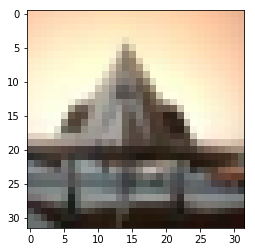

In [10]:
plt.imshow((a[0][0].numpy()*255).astype(int))

In [14]:
#[32*32*3, 40,10]
class SimpleNet(nn.Module):
    
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([nn.Linear(layers[i],layers[i+1]) for i in range(len(layers)-1)])
        
    def forward(self, seq):
        bs = seq.size()[0]
        X = seq.view(bs,-1)
        for layer in self.layers:
            X = F.relu(layer(X))
        return F.log_softmax(X,dim=-1)
    
    def get_device(self):
        p = next(self.parameters())
        device_type = str(p.device.type)
        device_index = p.device.index
        ret = device_type + ':' + str(device_index) if device_type == 'cuda' else device_type
        return torch.device(ret) 
    

m = SimpleNet([32*32*3,40,10]).cuda()
m

SimpleNet(
  (layers): ModuleList(
    (0): Linear(in_features=3072, out_features=40, bias=True)
    (1): Linear(in_features=40, out_features=10, bias=True)
  )
)

In [15]:
opt = optim.Adam(m.parameters(),lr=0.1)
loss_fn = F.nll_loss

In [17]:
core.fit(m,dl,3,opt,loss_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

model is been trained on cuda:0
Making batches... batch size: 64,num of batchese: 782


 33%|███▎      | 1/3 [00:03<00:07,  3.98s/it]

Epoch: 0, total loss: 1800.6213817596436
Making batches... batch size: 64,num of batchese: 782


 67%|██████▋   | 2/3 [00:07<00:03,  3.95s/it]

Epoch: 1, total loss: 1800.6213817596436
Making batches... batch size: 64,num of batchese: 782


100%|██████████| 3/3 [00:11<00:00,  3.91s/it]

Epoch: 2, total loss: 1800.6213817596436
Saving model to /data/gpf/gpf_dl/tests/tmp_torch_model.torch


In [18]:
img_paths, labels = zip(*path_labels_test)

In [19]:
img_paths, labels = zip(*path_labels_test)
dl = core.dl_img(np.array(img_paths), np.array(labels).astype(int),bs=64)

In [20]:
imgs,labels = zip(*dl)

Making batches... batch size: 64,num of batchese: 157


In [22]:
preds = core.predict_batch_img(m,imgs)

In [23]:
expects = []
a = [expects.extend(v.tolist()) for v in labels]

In [24]:
core.evaluation_matrix(np.array(preds),np.array(expects))

---------------------------0-------------------------------
total:  1000
correct:  1000
accuracy:  1.0
---------------------------1-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------2-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------3-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------4-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------5-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------6-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------7-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------8-------------------------------
total:  1000
correct:  0
accuracy:  0.0
---------------------------9-------------------------------
total:  1000
correct:  0
accuracy:  0

In [42]:
def gen(arr):
    for v in arr: yield v

g = gen([1,2,3])

In [43]:
for v in g: print(v)

1
2
3


In [44]:
for v in g: print(v)

In [45]:
class gen_c:
    def __init__(self, arr):
        self.arr = arr
    
    def __iter__(self):
        for v in self.arr: yield v

In [46]:
a = gen_c([1,2,3])

In [47]:
for v in a: print(v)

1
2
3


In [48]:
for v in a: print(v)

1
2
3


In [49]:
iter(g) is iter(g)

True

In [50]:
iter(a) is iter(a)

False